# 신경망

-----

인공 신경망 (ANN, artificial neural network)은 생물학적 뉴런의 작동 원에서 영감을 받은 머신러닝 모델이다.

* 생물학적 뉴런은 뇌에서 신호를 전달하고 처리하는 세포 단위

인공 신경망은 딥러닝의 핵심이며 다재다능하고 강력하고 확장성이 좋아 컴퓨터 비전, 자연어 처리 등 다양한 분야에서 활용된다.

먼저 가장 간단한 인공 뉴런인 TLU를 알아보고, 많이 사용되는 다층 퍼셉트론 (MLP, multi-layer perceptron)을 살펴본다.

## TLU (threshold logic unit)

-----
TLU(Threshold Logic Unit)는 이진 분류(binary classification)를 위한 가장 간단한 형태의 인공 뉴런이다.

* 하나의 TLU가 하나의 생물학적 뉴런을 모방한다.

TLU는 입력 $x_1, \cdots, x_n$의 가중치 합

$$ z = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n = \sum_{i=1}^{n} x_i w_i = \mathbf{x}^{\top} \mathbf{w} $$

을 계산한 뒤, $z$에 step function을 적용하여 결과를 출력한다. 

* 여기서 $w_i$는 모형 모수의 역할을 한다.
* 나중에 살펴보겠지만, 신경망의 훈련은 결국 데이터에 가장 잘 적합하는 최적의 $w_i$를 찾는 과정이다.

Step function은 $h_{\mathbf{w}}(\mathbf{x}) = \mathrm{step}(z) $로 나타내며, 다음과 같은 함수들이 이용되었다.

$$ \mathrm{heaviside}(z)  = \left \{ \begin{array}{ll} 0 & z<0 \\ 1 & z \geq 0 \end{array} \right.$$

혹은

$$ \mathrm{sgn}(z)  = \left \{ \begin{array}{lll} -1 & z<0 \\  0 & z = 0 \\ 1 & z > 0 \end{array} \right.$$

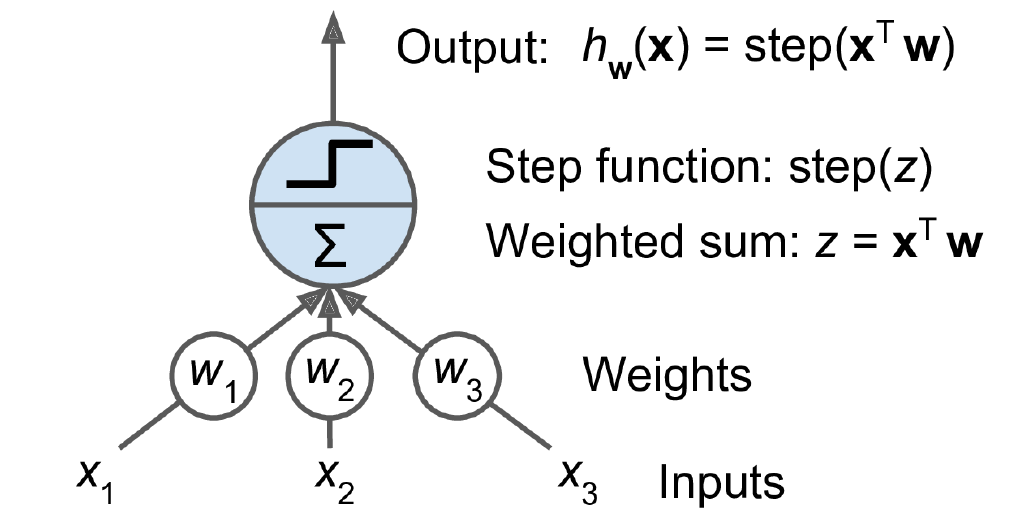

위의 간단한 TLU는 이진 분류 문제에 적용할 수 있다. 주어진 입력에 대해 0 혹은 1을 출력하여 두 클래스 중 하나로 분류하는 것이다.

TLU를 훈련한다는 것은 최적의 $w$들을 찾아 예측을 잘하는 분류기를 만든다는 것을 의미한다.

## 퍼셉트론

퍼셉트론이라는 용어는 TLU라는 용어와 혼용되어 사용되기도 한다.

하지만 종종 퍼셉트론은 여러 TLU로 구성되어 하나의 층 (layer)을 형성한 인공 신경망을 지칭하기도 한다.

즉, 퍼셉트론은 더 넓은 의미를 지칭하는 용어이며, TLU는 퍼셉트론의 한 종류로 볼 수 있다.

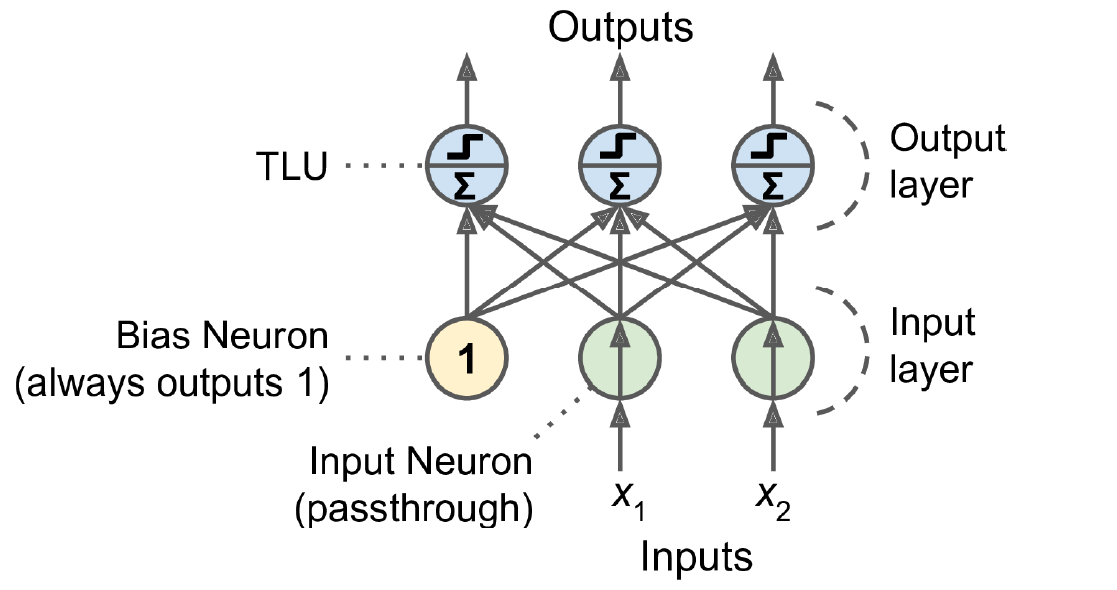

위 그림에서 퍼셉트론은 입력층과 출력층의 두 층으로 구성된 것을 볼 수 있다.  

퍼셉트론에서 입력층은 입력 뉴런인 $x_i$들과 항상 1을 출력하는 bias neuron으로 구성된다.

* 입력 뉴런은 데이터의 값을 그대로 전달하며, 훈련이나 계산이 이루어지지는 않음. 

그리고, 출력층의 각 TLU들은 입력층의 모든 input neuron과 연결되어 있는 것을 볼 수 있다.  

이런 관점에서 한 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때, 완전 연결 층 (fully connected layer) 혹은 밀집 층 (dense layer)라고 한다.

## 수학적 표기

위 퍼셉트론에서 여러 샘플에 대한 인공 뉴런 층의 출력을 다음과 같이 나타낼 수 있다.

$$ h_{\mathbf{w}, \mathbf{b}}(\mathbf{X}) = \phi(\mathbf{X} \mathbf{W}_b) $$

### 입력 샘플

여기서 $\mathbf{X}$는 $N \times (p+1)$ 샘플 행렬로 다음처럼 나타낼 수 있다.

$$ 
\mathbf{X} = \begin{bmatrix} 
    x_{11} & \cdots & x_{1p} & 1\\
    x_{21} & \cdots & x_{2p} & 1\\
     \vdots & \vdots & \ddots &  \vdots \\
    x_{N1} & \cdots & x_{Np} & 1  
    \end{bmatrix}
$$

만약 모형에 bias neuron이 없다면, 마지막 1로 이루어진 열은 생략된다.

### 가중치 행렬

그리고 가중치 행렬 $\mathbf{W}_b$의 행의 수는 이전 층에서의 출력 개수, 열의 개수는 해당 층의 출력 개수가 된다.

즉, 해당층에 총 $M$개의 TLU가 있다면, 해당층의 모수들은 다음과 같이 표현된다.

$$ \mathbf{W}_b = \begin{bmatrix} 
w_{11}  & w_{12} & \cdots & w_{1M} \\ 
\vdots  & \vdots &  \ddots & \vdots \\
w_{p1}  & w_{p2} & \cdots &  w_{pM} \\
b_1 & b_2 & \cdots & b_M
\end{bmatrix} 
=
\begin{bmatrix}
\mathbf{W} \\
\mathbf{b}^{\top}
\end{bmatrix} 
$$

$\mathbf{W}_b$의 원소인 $w_{ij}$는 $i$번째 입력 뉴런 (이전 단계)과 $j$번째 출력 뉴런 사이를 연결하는 가중치이다.

특히 마지막 행 벡터는 편향 뉴런에 대한 가중치 벡터로 $\mathbf{b}$로 표현하기도 한다. 

만약 모형에 bias neuron이 없다면, 이 마지막 행은 생략된다.

$\mathbf{W}_b$의 각 열은 각 TLU의 모수들을 나타낸다.

### 활성화 함수

$\phi$는 활성화 함수로 비선형적인 결과를 얻기 위해 도입되었다.  

* $\mathbf{X} \mathbf{W}_b$는 선형식이므로, 활성화 함수가 없다면 비선형적 관계를 표현할 수 없다. 

초창기에는 계단 함수 등이 사용되었으나, 나중에 살펴볼 역전파 알고리즘이 잘 작동하도록, 활성화 함수를 계단함수가 아닌 시그모이드 함수 등으로 바꾸어 이용한다.

$$ \sigma(z) = \frac{1}{1 + \exp(-z)}$$

그 외에 활성화 함수로 하이퍼볼릭 탄젠트 함수, ReLU 함수 등이 많이 사용된다.

$$ \tanh(z) = 2 \sigma (2z) - 1$$

$$ \mathrm{ReLU}(z) = \max(0, z) $$

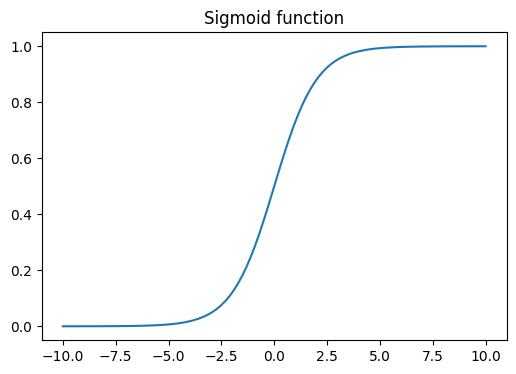

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z) : return 1 / (1 + np.exp(-z))
def tanh(z): return 2 * sigmoid(2*z) - 1
def ReLU(z): return np.maximum(0, z)

z = np.linspace(-10, 10, 100)

plt.figure(figsize=(6,4))
plt.plot(z, sigmoid(z))
plt.title("Sigmoid function")
plt.show()

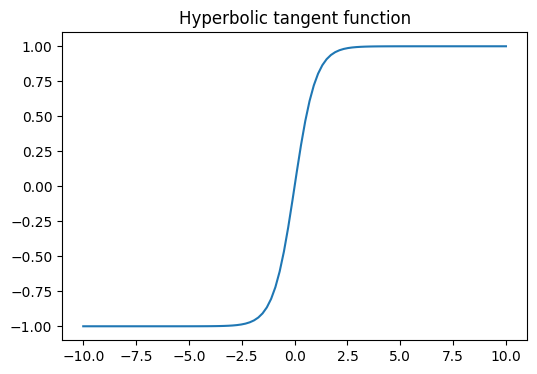

In [2]:
plt.figure(figsize=(6,4))
plt.plot(z, tanh(z))
plt.title("Hyperbolic tangent function")
plt.show()

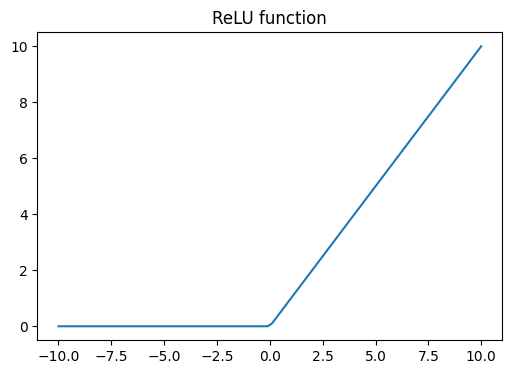

In [3]:
plt.figure(figsize=(6,4))
plt.plot(z, ReLU(z))
plt.title("ReLU function")
plt.show()

사이킷런에서 하나의 TLU 네트워크를 구현한 퍼셉트론 클래스를 제공한다.

[sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

하지만 일반적으로 인공 신경망을 구성하기 위해서는 tensorflow, keras나 pytorch 등과 같은 신경망 전문 모듈을 이용한다.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

단일층 퍼셉트론은 여러 약점이 존재한다.  

XOR 등 간단한 문제를 해결할 수 없다.  

XOR은 입력이 (0,0) 이거나 (1,1)이면 0을 출력하고, (1,0)이거나 (0,1)이면 1을 출력해야 하는데 단일층 퍼셉트론은 이 문제를 해결하지 못한다.

a | b | a XOR b 
--|--|:--:
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

## 다층 퍼셉트론 (Multi-layer perceptron)

퍼셉트론을 여러 층 쌓아올린 다층 퍼셉트론 (MLP)은 단층 퍼셉트론의 여러 제약을 줄일 수 있으며 XOR을 비롯하여 복잡한 문제를 해결할 수 있다.

MLP는 입력층 (input layer) 하나와 은닉층 (hidden layer)라 불리우는 하나 이상의 TLU 층과 마지막 출력층 (output layer)로 구성된다.

* 은닉층에서 복잡한 계산을 수행하게 되며, 은닉층의 구조에 따라 복잡한 패턴을 학습할 수 있다.
* 분류 문제에서는 sigmoid (이진분류)나 softmax (다중분류) 등의 함수를 출력층의 결과에 적용하여 최종 결론을 이끌어 낸다.

Hidden layer를 여러 개 쌓아 올린 인공 신경망을 심층 신경망 (DNN, deep neural network)이라고 한다.

다층 퍼셉트론은 역전파 (backpropagation) 알고리즘이라 불리우는 경사하강법을 이용하여 훈련한다.

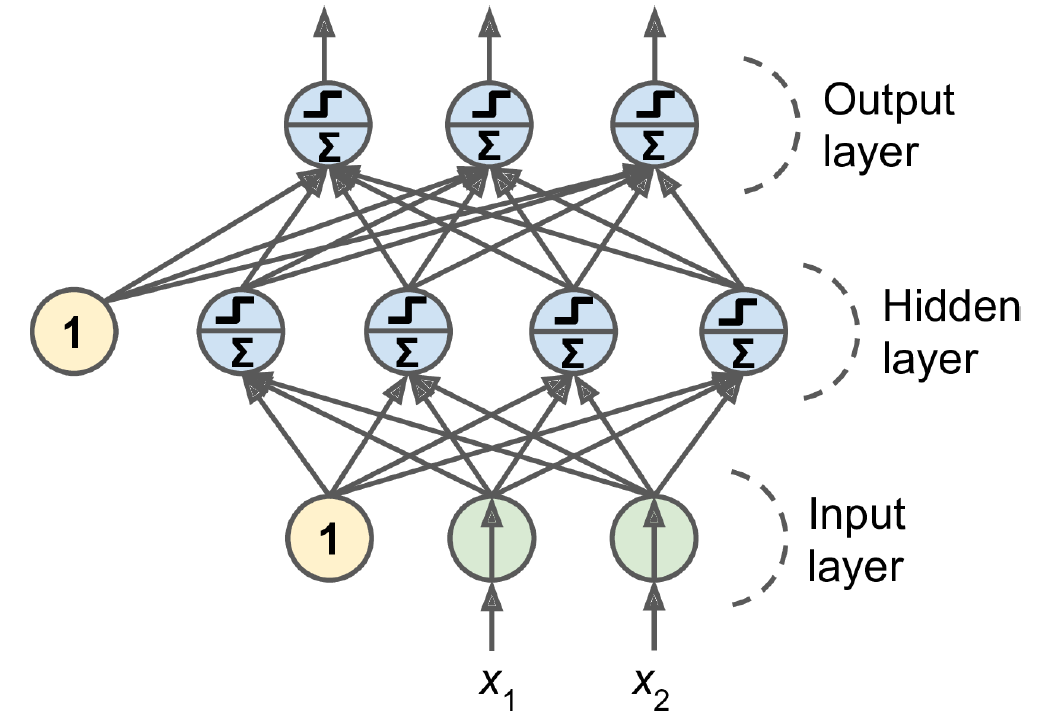

## 역전파 (Back propagation) 알고리즘

역전파 알고리즘은 인공 신경망 훈련의 핵심 개념이다.

역전파 알고리즘을 요약하자면, 각 훈련 샘플에 대해 현재의 모형 모수의 값을 바탕으로 먼저 예측값 $\hat y$을 계산하고 실제 $y$값과 비교하여 오차를 계산한다.
* 이 과정을 순전파 단계 (forward propagation)이라고도 한다.

그 다음 역방향으로 출력층으로부터 각 층을 거꾸로 거치면서 각 뉴런의 모수들이 오차에 기여한 정도를 측정한다. 
* 이 과정을 역전파 단계 (back propagation)이라고 한

마지막으로 이 오차가 감소하도록 경사하강법을 이용하여 가중치를 조정한다.

### 알고리즘 상세 

$L-1$개의 hidden layer가 있다고 하자. 

layer 0는 input layer를 뜻하고, layer 1부터 $L-1$까지는 hidden layer, layer $L$은 output layer를 뜻한다.

Input layer를 제외한 각 layer $\ell$에는 $s_{\ell}$개의 유닛들이 있고, $s_{L} = K$인 $K$-분류 문제를 생각해 보자.

* 다중 분류 문제에서 출력층의 뉴런의 수는 클래스의 수와 일치한다. 이 결과에 softmax를 적용하여 클래스 예측하는데 사용.
* 이진 분류 문제에서는 출력층의 뉴런의 수는 보통 하나로 한 후, sigmoid 함수를 적용한다.

output layer에서는 softmax 함수를 이용하여 클래스를 결정한다.
* 아래 그림에서 softmax 함수는 마지막 층의 모든 뉴런의 연산 결과를 이용해야 하므로, 이 뉴런들을 모두 커버하는 긴 직사각형의 형태로 그려짐

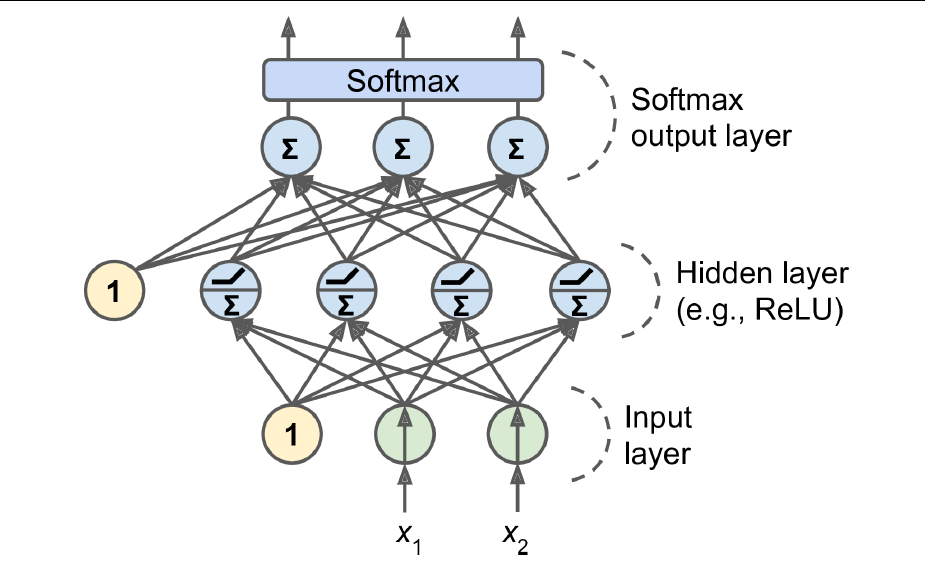

다양한 notation이 등장하므로 정리하고 시작하자.

* $w_{ij}^{(\ell)}$ : layer-$\ell$에 속한 가중치(모수)로 다음 두 값들의 관계를 나타낸다.<br><br>
  * $\ell-1$번째 layer의 유닛 $i$의 output인 $a_{i}^{(\ell-1)}$과<br><br>
  * $\ell$번째 layer의 유닛 $j$의 중간 output인 $z_{j}^{(\ell)}$ (중간 output이라 함은 활성 함수 적용 전)<br><br>
* $z_{j}^{(\ell)}$ : layer-$\ell$의 $j$번째 유닛의 중간 결과로 가중치 $w_{ij}^{(\ell)}$로 선형 변환 결과 <br><br>
* $a_{j}^{(\ell)}$ : $z_{j}^{(\ell)}$에 활성화 함수를 적용한 결과로 layer-$\ell$의 $j$번째 유닛의 output <br><br>

<p> <font color=#00008B> &#9635 Weight matrix와 관련된 미분 </font> </p>

즉,

$$ z_{j}^{(\ell)} = \sum_{i=1}^{s_{\ell - 1}}  a_i^{(\ell-1)} w_{ij}^{(\ell)}.$$

활성함수 $\phi$는 $z$에 적용된다. 즉,

$$ a_{j}^{(\ell)} = \phi (z_j^{(\ell)}).$$

미분을 통해 다음의 결과를 얻는다.

$$ \frac{\partial z_j^{(\ell)}}{\partial a_i^{(\ell - 1)}} = w_{ij}^{(\ell)}, \quad  \frac{\partial z_j^{(\ell)}}{\partial w_{ij}^{(\ell)}} = a_i^{(\ell - 1)} $$

<p> <font color=#00008B> &#9635 Cost function  </font> </p>

다중 분류 문제에서 stochastic gradient descent 방법을 적용할 경우, 주어진 데이터 하나에 대해 cost function은 cross entropy를 통해 다음과 같이 정의할 수 있다.

(마찬가지로 미니 배치 gradient descent의 경우 배치 단위로 여러 데이터에 대해 평균내어 cost function이 정의됨.)

$$ J = - \sum_{j=1}^{K} y_j \log p_j$$

여기서 $y_j$는 해당 데이터가 class $j$에 속하면 1이고 그렇지 않으면 0이다.

또한, $p_j$는 모형에서 예측한 각 클래스에 속할 확률로, 마지막 출력값들에 softmax 함수를 적용하여 얻는다.

$$ p_j = \frac{\exp(z_j^{(L)})}{\sum_{k=1}^{K} \exp(z_k^{(L)})}.$$

한편, Chain rule에 의해 계산 결과

$$ \frac{\partial J}{\partial z_j^{(L)}} =  
\sum_{i=1}^{K} \left(\frac{\partial J}{\partial p_i} \frac{\partial p_i}{\partial z^{(L)}_j} \right) = 
-\sum_{i=1}^{K} \left( \frac{y_i}{p_i} \frac{\partial p_i}{\partial z^{(L)}_j} \right) = - y_j(1-p_j) + p_j \sum_{i \neq j} y_i =   p_j - y_j $$

이다. 여기서

$$ \frac{\partial p_i}{\partial z^{(L)}_j} = \left\{\begin{array}{lr}
        p_j(1- p_j), & \text{for } k = j\\
        -p_i p_j, & \text{for } k \neq j \\
        \end{array}\right. $$
를 이용하였다.

우리의 최종 목적은 cost function $J$에 대해 다음의 값을 계산하는 것이다.

$$ \frac{\partial J}{\partial w_{ij}^{(\ell)}} $$

<p> <font color=#00008B> &#9635 &delta;</font> </p>

이를 위해 먼저

$$ \delta_{j}^{(\ell)} =  \frac{\partial J}{\partial z_j^{(\ell)}} $$

라고 정의하자.


위에서 계산한 바와 같이 마지막 층에 대해

$$ \delta_{j}^{(L)} = \frac{\partial J}{\partial z_j^{(L)}} = p_j - y_j, \quad\quad p_j = \frac{\exp(z_j^{(L)})}{\sum_{k=1}^{K} \exp(z_k^{(L)})}  $$

이다. 

Hidden layer들에 대해서도 비슷하게 전개할 수 있는데,

$$
\delta_{j}^{(\ell)} = \frac{\partial J}{\partial z_{j}^{(\ell)}}= 
\frac{\partial J}{\partial a_j^{(\ell)}}\frac{\partial a_j^{(\ell)}}{\partial z_{j}^{(\ell)}} = 
\left( \sum_{i=1}^{s_{\ell + 1}} \frac{\partial J}{\partial z_{i}^{(\ell + 1)}} \frac{\partial z_i^{(\ell + 1)}}{\partial a_j^{(\ell)}} \right) \frac{\partial a_j^{(\ell)}}{\partial z_j^{(\ell)}} = \left( \sum_{i=1}^{s_{\ell + 1}} \delta_i^{(\ell + 1)} w_{ij}^{(\ell + 1)} \right) \phi' (z_j^{(\ell)}).
$$

* 이 식은 back propagation의 핵심인데, $\ell$층의 값인 $\delta_{j}^{(\ell)}$를 $\ell+1$층의 값인 $\delta_{i}^{(\ell + 1)}$들로 표현할 수 있기 때문.

* 이것이 가능한 것은 chain rule을 다음과 같이 적용한 아이디어 덕분

$$ \frac{\partial J}{\partial a_{j}^{(\ell)}} = \sum_{i=1}^{s_{\ell + 1}} \frac{\partial J}{\partial z_{i}^{(\ell + 1)}} \frac{\partial z_i^{(\ell + 1)}}{\partial a_j^{(\ell)}}  $$

* 위 식을 해석하자면, $a_{j}^{(\ell)}$ 변화에 따른 $J$의 변화량은 다음 값들의 합:
  * $a_{j}^{(\ell)}$ 변화에 따른 $z_{1}^{(\ell + 1)}$의 변화량 $\times$ $z_{1}^{(\ell + 1)}$의 변화에 따른 $J$의 변화량
  * $a_{j}^{(\ell)}$ 변화에 따른 $z_{2}^{(\ell + 1)}$의 변화량 $\times$ $z_{2}^{(\ell + 1)}$의 변화에 따른 $J$의 변화량
  * $\hspace{5cm}\vdots$
  * $a_{j}^{(\ell)}$ 변화에 따른 $z_{s_{\ell + 1}}^{(\ell + 1)}$의 변화량 $\times$ $z_{s_{\ell + 1}}^{(\ell + 1)}$의 변화에 따른 $J$의 변화량 


마지막으로

$$ \frac{\partial J}{\partial w_{ij}^{(\ell)}} = \frac{\partial J}{\partial z_j^{(\ell)}} \frac{\partial z_j^{(\ell)}}{\partial w_{ij}^{(\ell)}} =  \delta_i^{(\ell)} a_j^{(\ell - 1)}.$$



<p> <font color=#00008B> &#9635 Matrix notation for gradient </font> </p>

Matrix notation 을 이용하면, $L$이 아닌 layer에서 $\delta^{(\ell)} = \begin{bmatrix}\delta^{(\ell)}_1,  \cdots, \delta^{(\ell)}_{s_\ell} \end{bmatrix}^{\top}$ 벡터는

$$ \delta^{(\ell)} = \begin{cases} \left( {\mathbf{W}^{(\ell + 1)}}^{\top} \delta^{(\ell + 1)} \right) \circ \phi'(z^{(\ell)}) & \text{if } \ell = 1, 
\cdots, L-1 \\
\mathbf{p} - \mathbf{y} & \text{if } \ell = L
\end{cases} $$

이다. 한편, $\mathbf{p} = \begin{bmatrix} p_1, \cdots, p_K \end{bmatrix}^{\top}, \enspace \mathbf{y} = \begin{bmatrix} y_1, \cdots, y_K \end{bmatrix}^{\top}$이고, $\circ$는 elementwise multiplication이다.


이를 이용하여 weight들에 대한 gradient matrix를 표현할 수 있다.  

$$ \nabla_{\mathbf{W}^{(\ell)}} J  = \delta^{(\ell)} {a^{(\ell-1)}}^{\top} $$

$$ \nabla_{\mathbf{b}^{(\ell)}} J  = \delta^{(\ell)}  $$


위 방법을 이용하면 모든 layer에 대해 gradient 벡터를 구할 수 있고, 이를 통해 경사 하강 업데이트를 적용하여 parameter들을 업데이트 한다.

예를 들어 학습률 $\eta$를 가지고 있으면

$$ w^{(\ell)}_{ij} \leftarrow w_{ij}^{(\ell)} - \eta \frac{\partial J}{\partial w_{ij}^{(\ell)}}.$$

<p> <font color=#00008B> &#9635 가중치 업데이트 과정 </font> </p>
가중치 업데이트 과정을 정리하면 다음과 같다.

* Step 1: 훈련 데이터의 배치를 가져온다.
* Step 2: Cost function의 값을 계산하기 위해 정방향으로 진행 (forward propagation)한다.
* Step 3: Back propagattion을 수행하여 그레디언트를 계산한다.
* Step 4: 계산된 그레디언트로 가중치 값들을 업데이트한다. 

## [케라스 (Keras)](https://keras.io/)

-----

Keras는 머신 러닝 플랫폼 TensorFlow에서 실행되는 Python으로 작성된 딥 러닝 API이다. 

빠른 실험을 가능하게 하는 데 중점을 두고 개발되었으며, 아이디어로부터 결과를 가능한 한 빨리 도출할 수 있도록 개발된 툴이다.

한편, TensorFlow 2는 end-to-end 오픈 소스 머신 러닝 플랫폼으로, 다음과 같은 네 가지 주요 기능을 가진다.

* CPU, GPU 또는 TPU에서 낮은 수준의 텐서 작업을 효율적으로 실행한다.

* 임의의 미분 표현식의 기울기를 계산할 수 있다.

* 계산을 multi-gpu 등 여러 장치로 확장한다. 

* 프로그램 ("그래프")을 서버, 브라우저, 모바일 및 임베디드 장치와 같은 외부 플랫폼으로 보낼 수 있음.

Keras는 TensorFlow 2의 고수준 API이며, 현대 딥 러닝에 중점을 두고 있으며, 접근하기 쉽고 생산성이 높은 인터페이스로서 머신 러닝 문제를 해결하기 할 수 있다.

반복 속도가 빠른 기계 학습 솔루션을 개발하고 제공하기 위한 필수 추상화 및 빌딩 블록을 제공한다.

Keras는 TensorFlow 2의 확장성과 교차 플랫폼 기능을 최대한 활용할 수 있도록 지원한다. 

대규모 GPU 클러스터에서 Keras를 실행할 수 있으며 Keras 모델을 내보내 브라우저 또는 모바일에서 실행할 수 있다.

### 데이터

아래 예제에서는 [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)로 생성된 가상의 데이터를 통한 실습을 진행해 본다.

In [5]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_training = X[250:, :]
X_testing = X[:250, :]
Targets_training = targets[250:]
Targets_testing = targets[:250]

Feature variable인 `X`가 2차원인 데이터이다. 

Target인 y는 두 개의 클래스로 구성되어 있다.

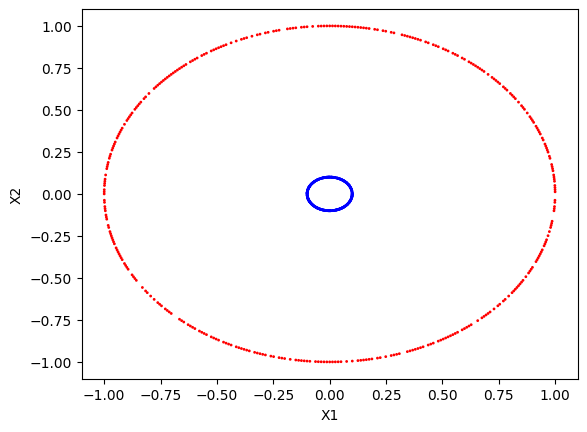

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_training[:,0], X_training[:,1], (Targets_training == 0).astype(float), color='red')
plt.scatter(X_training[:,0], X_training[:,1], (Targets_training == 1).astype(float), color='blue')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Sequential model

Keras의 핵심 데이터 구조는 layer와 model이다.

[`tensorflow.keras.Sequential`](https://keras.io/api/models/sequential/) : 가장 간단한 모델 유형은 layer의 선형 스택인 sequential 모델이다.

더 복잡한 아키텍처의 경우 layer의 임의 그래프를 작성하거나 서브 클래스를 통해 처음부터 완전히 모델을 작성할 수있는 Keras 기능 API를 사용해야 한다.

다음은 sequential 모델이다.

In [7]:
from tensorflow.keras import Sequential

model = Sequential()

In [8]:
type(model)

keras.src.engine.sequential.Sequential

In [9]:
# 아래와 같이 생성하기도 한다.
import tensorflow as tf
model = tf.keras.Sequential()

### [Layer](https://keras.io/api/layers/base_layer/#layer-class)

층 (layer)은 Keras에서 신경망의 기본 구성 요소이다. 

레이어는 신경망의 구조를 정의하고, 입력 데이터로부터 가중치와 활성화 함수를 이용한 변환을 수행하여 출력 데이터를 생성한다.

* Input object  
* Dense layer  
* Activation layer  
* Embedding layer  
* Masking layer  
* Lambda layer

#### Dense layer 

[`tensorflow.keras.layers.Dense` ](https://keras.io/api/layers/core_layers/dense/)로 구현되어 있으며, 가장 기본적인 뉴럴 네트워크 층으로 base layer를 상속받아 구현되었다.

Dense는 다음 작업을 구현한다. 

```output = activation(dot(input, kernel) + bias)```

주요 인자로는 다음과 같다.

* `units`: 양의 정수이며, 뉴런의 숫자.  
* `activation`: 활성화 함수의 종류. 기본값은 linear 함수
* `use_bias`: Boolean, bias vector의 이용 여부

[```.add()```](https://keras.io/api/models/sequential/#add-method)를 이용하여 생성된 모형에 순차적으로 layer들을 쌓는 것이 가능하다.

아래 코드에서 `input_shape=(2,)`은 입력 변수가 두 개의 차원으로 이루어졌음을 의미한다.

마지막으로 추가된 layer에서 유닛의 개수는 하나이며, 활성화 함수로 sigmoid 함수를 사용하고 있다. 

* 이 예제에서 y가 두 개의 클래스로 구성된 이진 분류 문제이기 때문이다. 

In [10]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(2,), activation='relu'))  # 2개의 feature variable을 받을 예정
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))   # binary class 구별을 위함

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 컴파일

모델이 좋아 보이면 [```.compile()```](https://keras.io/api/models/model_training_apis/#compile-method)을 사용하여 학습 프로세스를 구성한다.

컴파일은 모델 생성의 마지막 단계로 컴파일이 완료되면 훈련 단계로 넘어갈 수 있다. 

컴파일에서는 주로 다음과 같은 작업을 설정한다.

* 손실 함수(loss function) 정의: 모델이 최소화하려는 손실 함수를 지정.

* 옵티마이저(optimizer) 설정: 옵티마이저는 손실 함수를 최소화하기 위해 가중치를 업데이트하는 방법을 설정. 

* 평가 지표(metrics) 정의: 모델의 성능을 평가하는 데 사용되는 지표를 설정. 

아래 코드에서 loss function으로 `'binary_crossentropy'`를 사용하였다. 

이는 이번 예제에서 2개의 클래스로 구성된 y를 분류하는 문제를 다루기 때문이다.

이 손실 함수의 식은 다음과 같다.

$$L(y, \hat y) = - y  \log(\hat y) - (1 - y)  \log(1 - \hat y)$$


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### [Loss](https://keras.io/api/losses/) function

머신러닝에서 Loss 함수는 학습 과정에서 오류나 편차를 찾는 데 사용되며, Keras는 모델 컴파일 과정에서 loss function이 필요하다.

Keras는 상당히 많은 종류의 loss function을 제공한다.

* mean_squared_error  
* mean_absolute_error  
* mean_absolute_percentage_error  
* mean_squared_logarithmic_error  
* squared_hinge  
* hinge  
* categorical_hinge  
* logcosh  
* huber_loss  
* categorical_crossentropy  
   * y label is one-hot vector representation, e.g., (0, 0, 0, 0, 1, 0, 0)
* sparse_categorical_crossentropy  
   * y label is integers
* binary_crossentropy  
   * y label is 0 or 1
* kullback_leibler_divergence  
* poisson  
* cosine_proximity  
* is_categorical_crossentropy

이 중 많이 사용되는 것으로는 mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy 등이 있다.

#### [Optimizer](https://keras.io/api/optimizers/)

기계학습에서 최적화는 예측과 손실 함수를 비교하여 입력 가중치를 최적화하는 중요한 프로세스이다.  
Keras는 다양한 optimizer를 제공한다.

* SGD − Stochastic gradient descent optimizer.

* RMSprop − RMSProp optimizer.

* Adagrad − Adagrad optimizer.

* Adadelta − Adadelta optimizer.

* Adam − Adam optimizer.

* Adamax − Adamax optimizer from Adam.

* Nadam − Nesterov Adam optimizer.

####  [Metrics](https://keras.io/api/metrics/)

기계학습에서 Metrics는 모델의 성능을 평가하는 데 사용되며, 손실 함수와 유사하지만 훈련 과정에서는 사용되지 않고, 훈련 결과나 테스트 셋에 대한 예측 결과를 평가하는 데에 사용된다. 

분류 문제에서는 다음과 같은 metric들이 활용된다.

* accuracy
* binary_accuracy
* categorical_accuracy
* sparse_categorical_accuracy
* top_k_categorical_accuracy
* sparse_top_k_categorical_accuracy
* cosine_proximity
* clone_metric


회귀 문제에서는 다음과 같은 metric들이 활용된다.

* mean_squared_error  
* mean_absolute_error  
* mean_absolute_percentage_error  
* mean_squared_logarithmic_error 

필요한 경우 최적화 프로그램을 추가로 구성할 수 있다. 
Keras의 철학은 단순한 것을 단순하게 유지하면서 사용자가 필요할 때 완전히 제어 할 수 있도록 하는 것이다.

### 훈련

이제 훈련 데이터를 학습할 수 있다.

위에서 이미 생성한 numpy array들을 이용하여 학습할 수 있으며, [```.fit()```](https://keras.io/api/models/model_training_apis/#fit-method) method를 이용한다.

다음의 문법 구조를 가진다.

```model.fit(X, y, epochs = , batch_size = )```

* `epochs` : 전체 데이터셋을 몇 번 반복해서 학습할지를 나타내는 매개변수로 하나의 에포크(epoch)는 전체 데이터셋을 한 번 훑는 것을 의미
* `batch_size` : 한 번의 가중치 업데이트를 수행하기 위해 사용되는 샘플의 개수

In [13]:
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5)

Epoch 1/30
150/150 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.4707
Epoch 2/30
150/150 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.7200
Epoch 3/30
150/150 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7173
Epoch 4/30
150/150 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.7427
Epoch 5/30
150/150 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.8013
Epoch 6/30
150/150 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8427
Epoch 7/30
150/150 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.8653
Epoch 8/30
150/150 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8720
Epoch 9/30
150/150 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8760
Epoch 10/30
150/150 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8853

[`.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method)으로 모델의 성능 평가를 할 수 있다.

In [14]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(model.metrics_names)
print(test_results)

8/8 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 1.0000
['loss', 'accuracy']
[0.05642853304743767, 1.0]


### 예측

[`.predict()`](https://keras.io/api/models/model_training_apis/#predict-method)로 훈련된 모형을 통해 예측한다.

현재 모형의 마지막 층의 활성함수인 sigmoid 함수는 0과 1사이의 실수(확률)를 내보내기 때문에, 0.5를 기준으로 0.5보다 작으면 0의 클래스를, 크면 1의 클래스를 배정한다.

이 과정은 뉴럴 네트워크 모형과 별도의 코드로 작성해 주어야 한다. 

In [15]:
y_prob = model.predict(X_testing)
predicted_class = np.where(y_prob > 0.5, 1,0)

8/8 [==============================] - 0s 2ms/step


예측값과 실제값을 비교해 보자.

In [16]:
np.c_[predicted_class, Targets_testing][:,:20]

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1,

## Tensorflow 
-------------------
딥러닝 및 기계 학습을 위한 오픈소스 라이브러리로, 구글에서 개발하고 관리한다.

앞에서 살펴본 Keras는 TensorFlow의 고수준 API 중 하나로, TensorFlow 위에서 구축된 딥러닝 모델을 쉽게 정의하고 훈련시킬 수 있게 해주는 라이브러리이다.

Tensorflow의 주요 특징으로 다음과 같다.

- 그래프 기반 계산: TensorFlow는 계산을 그래프로 나타내며, 이를 통해 효율적인 분산 학습과 추론이 가능하다.

- 자동 미분: TensorFlow는 자동 미분을 지원하여 모델 학습에 필요한 그래디언트를 자동으로 계산할 수 있다. 이를 통해 사용자가 정의한 손실 함수에 대한 최적화가 가능하다.

- 다양한 플랫폼 지원: TensorFlow는 CPU, GPU, TPU와 같은 다양한 하드웨어에서 실행 가능하며, 모바일 기기 및 임베디드 시스템과 같은 환경에서도 동작한다.

- 고수준의 API: TensorFlow는 높은 수준의 API인 Keras를 포함하고 있어, 사용자가 간편하게 신경망을 구축하고 훈련시킬 수 있다.
  
- 텐서보드: TensorFlow는 학습 과정을 시각화하고 모델을 디버깅하기 위한 도구인 텐서보드를 제공한다.

### Tensor의 기본 성질

Tensorflow의 tensor들은 기본적으로 `numpy.ndarray`와 비슷하게 작동한다.

일종의 multidimensional array라고 생각할 수 있다.

단, 기본적으로 32bit 체계를 사용하기 때문에, 일반적으로 사용되는 64bit 체계와 비교했을 때, 소숫점 아래 계산에서 약간의 오차가 있을 수 있다.

In [17]:
import tensorflow as tf
tf.constant([[1., 2., 3.], [4., 5., 6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [18]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [19]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [20]:
t.shape

TensorShape([2, 3])

In [21]:
t.dtype

tf.float32

In [22]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [23]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [24]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [25]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [26]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [27]:
tf.exp(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[  2.7182817,   7.389056 ,  20.085537 ],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

In [28]:
tf.reduce_sum(t)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [29]:
tf.reduce_mean(t, axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.5, 3.5, 4.5], dtype=float32)>

Tensorflow는 numpy와 호환이 잘 된다.

In [30]:
import numpy as np
a = np.array([2., 4., 5.])

In [31]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [32]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [33]:
t + a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 3.,  6.,  8.],
       [ 6.,  9., 11.]], dtype=float32)>

In [34]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [35]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Type 변환을 자동으로 하지 않기 때문에 주의해야 한다.

다음 코드는 에러가 발생한다.

`tf.constant(2.) + tf.constant(40)`

In [36]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

Tensor들은 기본적으로 immutable하여 한 번 값이 정해지면 바꿀 수 없다.

따라서, parameter 값들을 업데이트 해야 하는 경우, 일반적은 tensor를 쓸 수 없다.

이 경우에는 `tf.Variable`을 이용한다.

In [37]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

`assign` method나 `scatter_nd_update` 등을 이용하여 Variable의 값을 업데이트 할 수 있다.

In [38]:
v.assign(2 * v)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [39]:
v[0, 1].assign(42)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [40]:
v[:, 2].assign([0., 1.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [41]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

### Gradient 계산

Tensorflow의 강점은 autodiff 기능을 이용하여 미분을 빠르게 계산하는 것이다.

먼저 일반적인 미분값 근사 방법을 살펴보자.

In [42]:
def f(w1, w2): return 3 * w1 ** 2 + 2 * w1 * w2

In [43]:
w1, w2 = 5, 3
eps = 1e-6

다음은 각각 `f` 함수의 `(w1, w2) = 5, 3`에서 `w1`과 `w2`에 대한 편미분 (근사)값이다.  

In [44]:
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [45]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

`tf.GradientTape`는 TensorFlow에서 자동 미분(automatic differentiation)을 수행하기 위한 API 중 하나이다.

자동 미분은 주어진 입력 변수에 대한 그래디언트(편미분)를 자동으로 계산하는 기능을 제공하여, 주로 머신러닝에서 모델을 훈련시키는데 사용된다. 

`tf.GradientTape`를 사용하면 계산한 모든 연산 과정을 "테이프"에 기록한다.

- 이러한 과정은 그래프의 형태로 저장된다.

아래 예제에서는 `f(w1 = 5, w2 = 3) = 3 * (w1=5) ** 2 + 2 * (w1=5) * (w2=3)`의 계산 과정을 테이프에 기록한다.

이 계산 과정을 일단 기록하면, 기록된 과정을 다시 따라가는 방식으로 비교적 빠르게 그래디언트를 계산할 수 있다.

In [46]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

In [47]:
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]